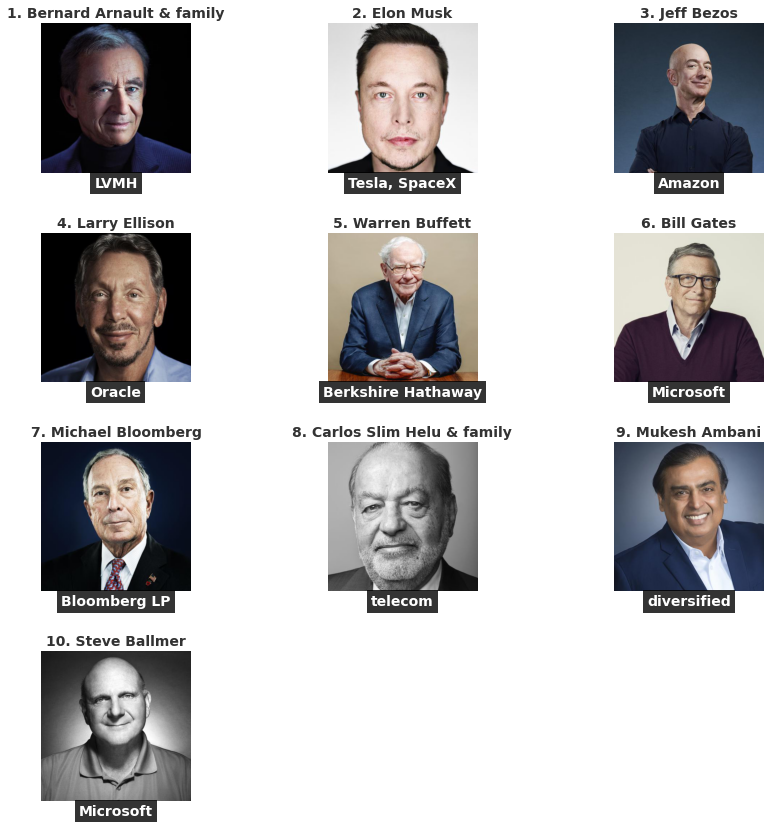

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
import re
import io


url = 'https://forbes400.onrender.com/api/forbes400?limit=10'

response = requests.get(url)


if response.status_code == 200:
    data = response.json()
    num_rows = 4
    num_cols = 3
    fig = plt.figure(figsize=(12, 12))
    grid = plt.GridSpec(num_rows, num_cols, wspace=0.4, hspace=0.4, top=0.95, bottom=0.05, left=0.05, right=0.95)
    for i, item in enumerate(data):
        name = item["person"]["name"]
        position = item["rank"]
        company = item["source"]
        image_url = item["person"]["squareImage"]
        if not re.match(r"https?://", image_url):
            image_url = "https:" + image_url
        response = requests.get(image_url)
        image_data = response.content
        image = Image.open(io.BytesIO(image_data))
        ax = fig.add_subplot(grid[i])
        ax.imshow(image, extent=[-0.6, 0.6, -0.6, 0.6])
        ax.axis('off')
        ax.set_title(str(position)+'. '+name, fontweight="bold", color="black",
                     fontsize=14, alpha=0.8)
        ax.margins(0.2)
        # Add company name below the image
        # Add a background color to the text
        text_box = ax.text(0, -0.68, company, ha="center", va="center",
                           fontsize=14, fontweight="bold", color="white")
        text_box.set_bbox(dict(facecolor='black', alpha=0.8, edgecolor='none'))
    plt.show()
else:
    print(f'Failed to access the API: {response.status_code}')
